# ImageNet DataLoaders with Deeplake

In [1]:
import deeplake
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

### log in to deeplake


In [ ]:
# login is required
!activeloop login -u username -p password

## Load dataset

In [2]:
dataset = deeplake.load("hub://activeloop/imagenet-train")

hub://activeloop/imagenet-train loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/imagenet-train


In [3]:
tform = transforms.Compose([
    transforms.ToPILImage(), # Must convert to PIL image for subsequent operations to run
    transforms.RandomResizedCrop(100), # take random crops of size 100x100
    transforms.ToTensor(), # Must convert to pytorch tensor for subsequent operations to run
    transforms.Lambda(lambda x: x.repeat(int(3/x.shape[0]), 1, 1)), # Some images are grayscale, so we need to add channels
    transforms.Grayscale(num_output_channels=1), # we then turn all images to greyscale
    transforms.Normalize([0.4876], [0.2756,]), # now we normalize with the 
])

dataloader = dataset.pytorch(num_workers=0, 
                            batch_size=64, 
                            transform={'images': tform, 'labels': None}, 
                            shuffle=False)

/usr/local/lib/python3.8/dist-packages/deeplake/integrations/pytorch/common.py:91: UserWarning: Decode method for tensors ['images'] is defaulting to numpy. Please consider specifying a decode_method in .pytorch() that maximizes the data preprocessing speed based on your transformation.
  warnings.warn(


In [4]:
batch = next(iter(dataloader))

In [6]:
batch["images"].shape

torch.Size([64, 1, 100, 100])

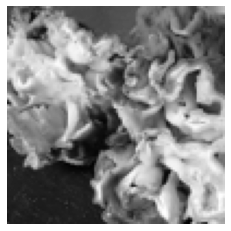

In [9]:
plt.imshow(batch["images"][0,0], cmap="gray")
plt.axis("off");

# RGB ImageNet

these would be the default transforms for imagenet with an img size of 224x224

In [10]:
tform =transforms.Compose([
    transforms.ToPILImage(), # Must convert to PIL image for subsequent operations to run
    transforms.CenterCrop(224),
    transforms.ToTensor(), # Must convert to pytorch tensor for subsequent operations to run
    transforms.Lambda(lambda x: x.repeat(int(3/x.shape[0]), 1, 1)), # Some images are grayscale, so we need to add channels
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

dataloader = dataset.pytorch(num_workers=0, 
                            batch_size=64, 
                            transform={'images': tform, 'labels': None}, 
                            shuffle=False)

/usr/local/lib/python3.8/dist-packages/deeplake/integrations/pytorch/common.py:91: UserWarning: Decode method for tensors ['images'] is defaulting to numpy. Please consider specifying a decode_method in .pytorch() that maximizes the data preprocessing speed based on your transformation.
  warnings.warn(


In [11]:
batch = next(iter(dataloader))

In [12]:
batch["images"].shape

torch.Size([64, 3, 224, 224])

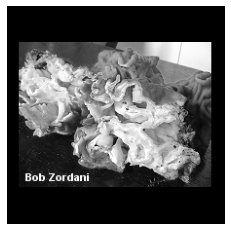

In [13]:
plt.imshow(batch["images"][0,0], cmap="gray")
plt.axis("off");

because we don't shuffle, the images of the both dataloaders (above and here) are the same